<a href="https://colab.research.google.com/github/Israt1063/2.Preprocessing-and-Contour-Based-Tumor-Detection-from-Brain-MRI/blob/main/2_Preprocessing_and_Contour_Based_Tumor_Detection_from_Brain_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Step | Name                    | Purpose                                |
| ---- | ----------------------- | -------------------------------------- |
| 1    | Import libraries        | Load OpenCV, NumPy, and matplotlib     |
| 2    | Load MRI image          | Read brain MRI image using OpenCV      |
| 3    | Show original image     | Visual inspection                      |
| 4    | Grayscale conversion    | Simplify image processing              |
| 5    | Gaussian Blur           | Reduce noise before segmentation       |
| 6    | Otsu Thresholding       | Binary segmentation of image           |
| 7    | Morphological Filtering | Clean segmentation mask                |
| 8    | Contour Detection       | Find tumor boundaries                  |
| 9    | Draw Contours           | Visualize tumor area on original image |


Excellent! Let’s go **step-by-step** into the **why (কেন?)** behind each step of the brain tumor image preprocessing and segmentation pipeline using OpenCV.

---

## ✅ Full Pipeline Breakdown with "Why" (কেন?)

---

### 1. **Reading MRI Brain Tumor Images**

```python
img = cv2.imread('brain_mri.jpg')
```

🔍 **কেন?**
Image load করা হয় যাতে আমরা তার উপর analysis করতে পারি। MRI ফাইল গুলো `.jpg`, `.png`, বা `.nii` format এ থাকতে পারে। OpenCV `cv2.imread()` দিয়ে `.jpg` বা `.png` load করা যায়।

---

### 2. **Grayscale Conversion**

```python
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```

🔍 **কেন?**
MRI ছবি গুলা color important না—tumor segmentation এর জন্য shape, brightness important.
Grayscale করলে computation সহজ হয়, কারণ color image এ 3 channel থাকে (RGB), আর grayscale এ মাত্র 1 channel।

---

### 3. **Noise Removal (Gaussian Blur)**

```python
blur = cv2.GaussianBlur(gray, (7, 7), 0)
```

🔍 **কেন?**
MRI image এ অনেক সময় ছোট ছোট noise থাকে যেগুলা thresholding বা contour detect করার সময় সমস্যা করে।
Gaussian Blur smooth করে image, যেন sharp noise remove হয়।
`(7,7)` হল kernel size—bigger kernel = more smooth.

---

### 4. **Thresholding**

```python
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
```

🔍 **কেন?**
Thresholding হল একটা method যা image কে 2 ভাগে ভাগ করে (background vs. object)।
Tumor অংশ সাধারণত bright হয়, thresholding দিয়ে আমরা ঐ অংশ আলাদা করতে পারি।
Otsu's method automatically best threshold value select করে।

---

### 5. **Morphological Filtering**

```python
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
```

🔍 **কেন?**
Thresholding এর পরে image এ ছোট ছোট noise বা গর্ত (holes) থাকতে পারে।

* **Opening (erosion→dilation):** removes small white noise
* **Closing (dilation→erosion):** fills small holes in white regions (tumor)

---

### 6. **Finding Contours**

```python
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
```

🔍 **কেন?**
Contour হল edge বা boundary detect করার technique। Tumor এর চারপাশে boundary detect করে আমারা তার shape, size, location বের করতে পারি।

---

### 7. **Drawing Contours on the Original Image**

```python
cv2.drawContours(img, contours, -1, (0,255,0), 2)
```

🔍 **কেন?**
Contour গুলো image এর উপর draw করলে visually বুঝা যায় tumor কোন অংশে আছে। এটি diagnosis এবং visualization এ অনেক helpful।

---

## 🎯 Summary Table:

| Step | Technique Used                          | কেন প্রয়োজন                                 |
| ---- | --------------------------------------- | ------------------------------------------- |
| 1    | `cv2.imread()`                          | Image load করা                              |
| 2    | `cv2.cvtColor(..., cv2.COLOR_BGR2GRAY)` | Color to grayscale — simple computation     |
| 3    | `cv2.GaussianBlur()`                    | Noise remove করে smooth image পাওয়া         |
| 4    | `cv2.threshold(... + OTSU)`             | Tumor অংশ binary ভাবে separate করা          |
| 5    | `morphologyEx()`                        | Clean binary mask: noise remove & hole fill |
| 6    | `cv2.findContours()`                    | Tumor boundary detect করা                   |
| 7    | `cv2.drawContours()`                    | Visualize tumor outline on original image   |

---



####

In [19]:
# Mount Google Drive (to access kaggle.json)
from google.colab import drive
drive.mount('/content/drive')

# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip dataset
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection --unzip -p /content/brain_tumor_data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 596MB/s]


In [20]:
# ✅ Step 1: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# ✅ Step 2: Load the MRI image (example with tumor)
image_path = "/content/brain_tumor_data/yes/Y1.jpg"  # Replace with your image path
img = cv2.imread(image_path)

# Check if image loaded correctly
if img is None:
    print("Image not found.")
    exit()
else:
    print("Image loaded. Shape:", img.shape)


Image loaded. Shape: (218, 180, 3)


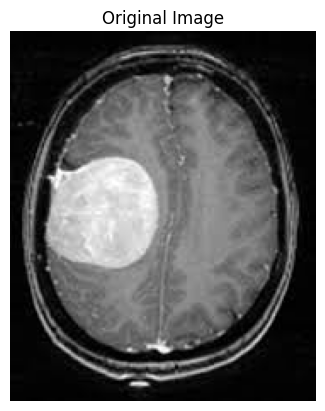

In [22]:
# ✅ Step 3: Show the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()


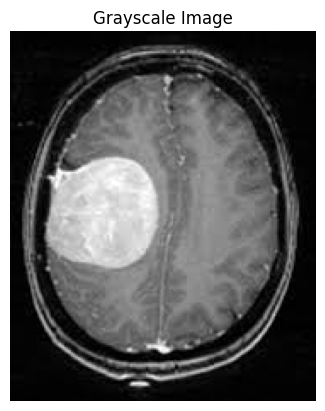

In [23]:
# ✅ Step 4: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


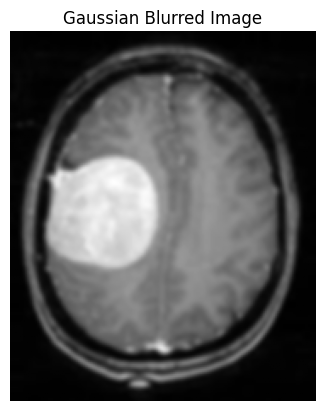

In [24]:
# ✅ Step 5: Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (7, 7), 0)

plt.imshow(blur, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis('off')
plt.show()


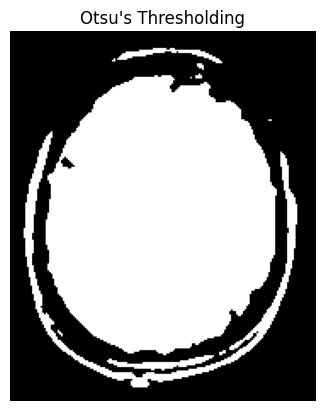

In [25]:
# ✅ Step 6: Apply Otsu's Thresholding for binary segmentation
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')
plt.show()


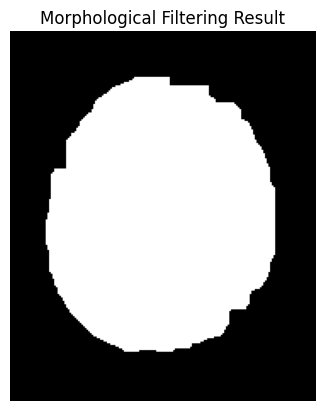

In [26]:
# ✅ Step 7: Morphological Filtering to clean the binary mask
kernel = np.ones((5, 5), np.uint8)

# Opening: removes small noise
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Closing: fills small holes
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.imshow(closing, cmap='gray')
plt.title("Morphological Filtering Result")
plt.axis('off')
plt.show()


In [27]:
# ✅ Step 8: Find Contours of the segmented regions
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contours found:", len(contours))


Contours found: 1


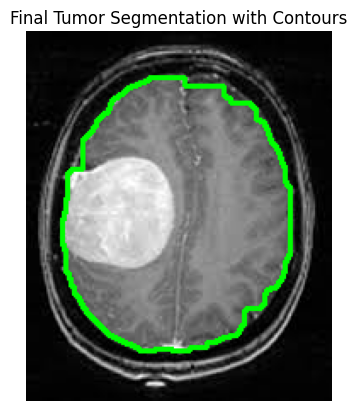

In [28]:
# ✅ Step 9: Draw the detected contours on the original image
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Final Tumor Segmentation with Contours")
plt.axis('off')
plt.show()
